In [2]:
%matplotlib inline

import os 
import sys 
import time
import hashlib

from datetime  import datetime 

import numpy as np  # learn 
import pandas as pd # learn
from pandas import *
from numpy import *

from scipy import stats # look at scipy
from scipy import linalg
from scipy import *
 
import matplotlib as mplt # learn matplolib 
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

# import seaborn as sns 
# sns.set_style("whitegrid")
# sns.set(rc={"figure.figsize": (14, 6)})

import IPython
from IPython.display import display


import matplotlib
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
 
# import sklearn as sk
import itertools

# from pyspark import SparkContext, SparkConf
# from pyspark.sql import SQLContext
# from pyspark.sql.types import *
# from pyspark.mllib.regression import LabeledPoint

from keras.models import Sequential 
from keras.layers.core import Dense, Activation, TimeDistributedDense, Dropout
from keras.layers.recurrent import LSTM
from keras.optimizers import *
# RMSprop, Adadelta
from keras.regularizers import l2, activity_l2

import scipy.stats as st

# http://sebastianruder.com/optimizing-gradient-descent/
# https://leemendelowitz.github.io/blog/how-does-python-find-packages.html

Using Theano backend.


In [4]:
def load_dataset( file_path, seperator, drop_na ):
    tmpdf= pd.read_csv( file_path , sep=seperator)
#         "/home/guo/rnn_changePoint/dataset/"+"house-power.csv"
    print tmpdf.columns
    print tmpdf.shape

    if drop_na == True:
        tmpdf = tmpdf.dropna(axis=0)
    print tmpdf.shape

# tmpdf = tmpdf[ tmppdf['Global_active_power'] != '?' ]
    print tmpdf.shape
    
    return tmpdf, tmpdf.columns

def load_plot_col( tmpdf, colum_name ):
    tmplist = list(tmpdf[colum_name])
    tmplist = [float(i)  for i in tmplist]
    
    figure_size= ( 13.4,7)
    legend_font= 8.5
    fig = plt.figure()
    fig.set_size_inches( figure_size )
    plt.plot( tmplist, label='value drifts: x_t - t_(t-1)' )

def load_plot_col( tmpdf, colum_name, stline,edline ):
    tmplist = list(tmpdf[colum_name])
    tmplist = [float(i)  for i in tmplist]
    
    tmplist = tmplist[stline:edline]
    
    figure_size= ( 13.4,7)
    legend_font= 8.5
    fig = plt.figure()
    fig.set_size_inches( figure_size )
    plt.plot( tmplist, label='value drifts: x_t - t_(t-1)' )


Index([u'Date', u'Time', u'Global_active_power', u'Global_reactive_power',
       u'Voltage', u'Global_intensity', u'Sub_metering_1', u'Sub_metering_2',
       u'Sub_metering_3'],
      dtype='object')
(9999, 9)
(9997, 9)
(9997, 9)


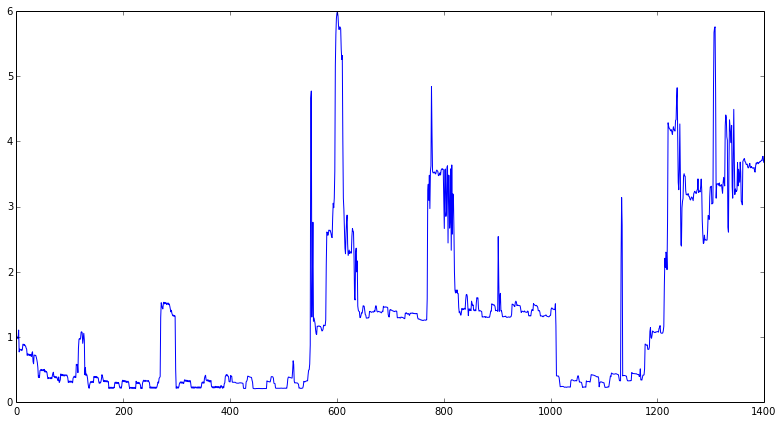

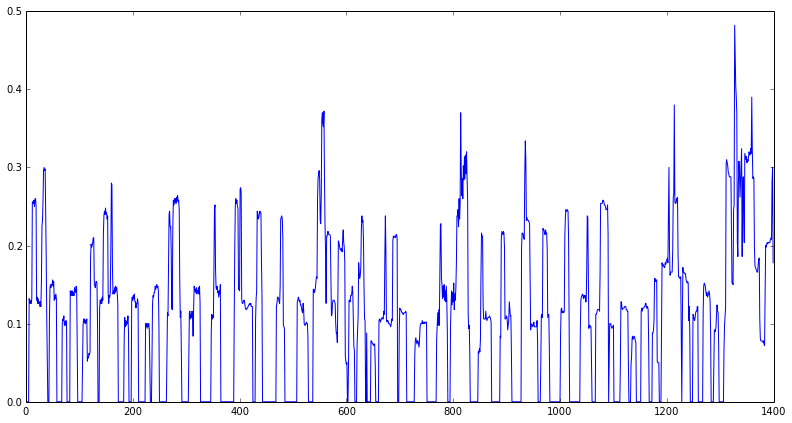

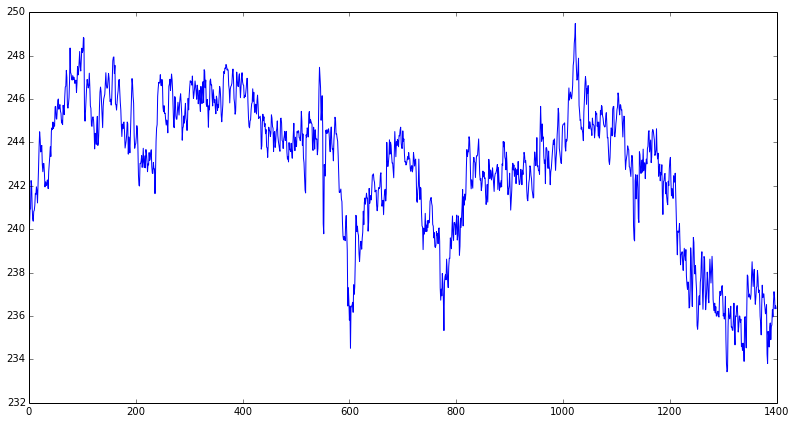

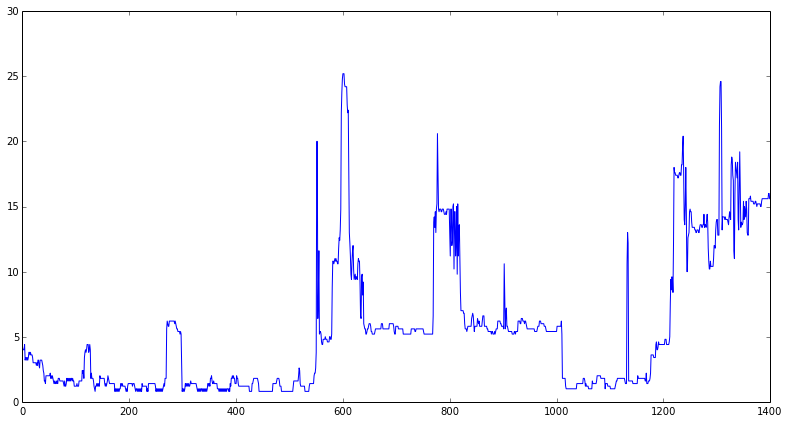

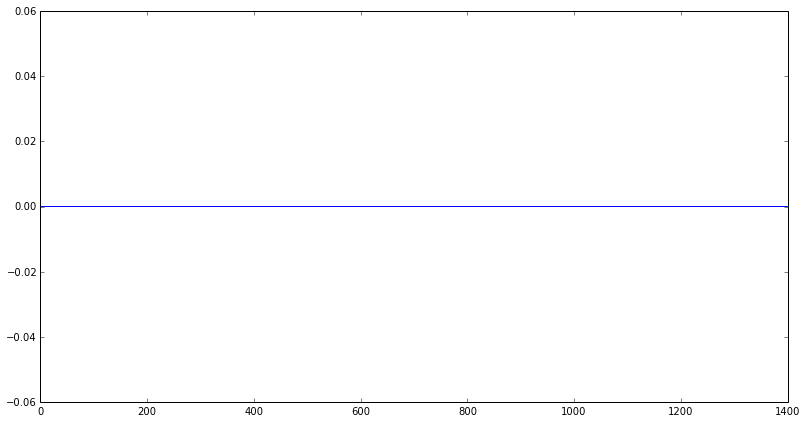

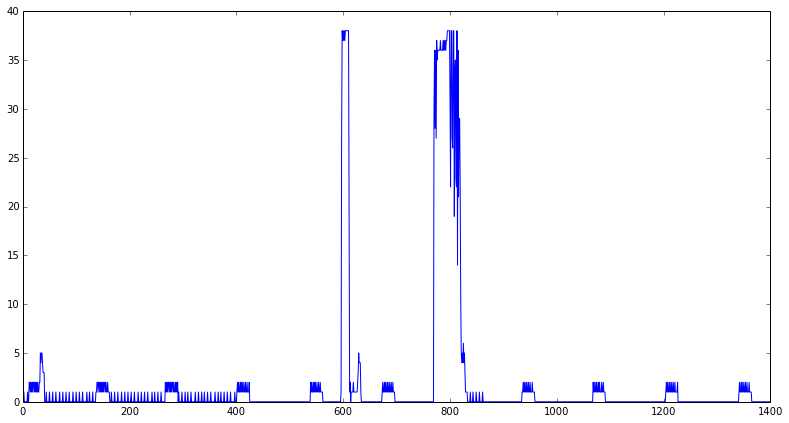

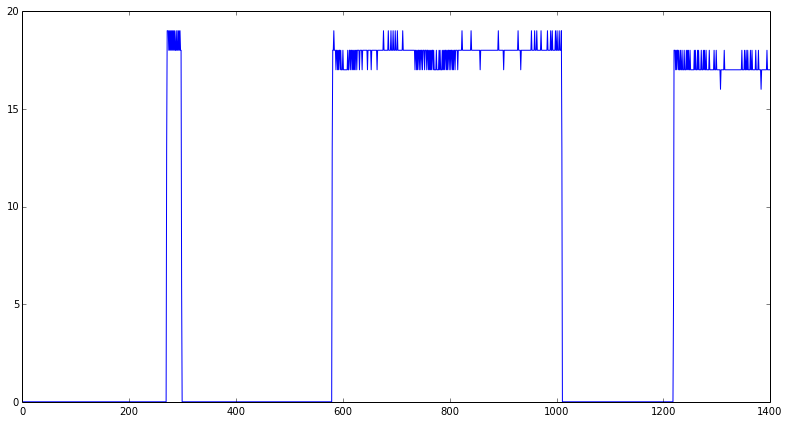

In [196]:
hp_df, hp_columns = load_dataset("/home/guo/rnn_changePoint/dataset/"+"house-power.csv",';'\
                                 ,True)

hpcnt= hp_df.shape[0]
for i in range(2, len(hp_columns) ):
    load_plot_col( hp_df, hp_columns[i], 4600, 6000)

In [138]:
aq_df, aq_columns = load_dataset("/home/guo/rnn_changePoint/dataset/"+"air-quality.csv",\
                                 ';', False)


aq_cnt= aq_df.shape[0]
# for i in range(2, len(columns)-1 ):
#     load_plot_col( tmpdf, columns[i] )

Index([u'Date', u'Time', u'CO(GT)', u'PT08.S1(CO)', u'NMHC(GT)', u'C6H6(GT)',
       u'PT08.S2(NMHC)', u'NOx(GT)', u'PT08.S3(NOx)', u'NO2(GT)',
       u'PT08.S4(NO2)', u'PT08.S5(O3)', u'T', u'RH', u'AH', u'Unnamed: 15',
       u'Unnamed: 16'],
      dtype='object')
(9471, 17)
(9471, 17)
(9471, 17)


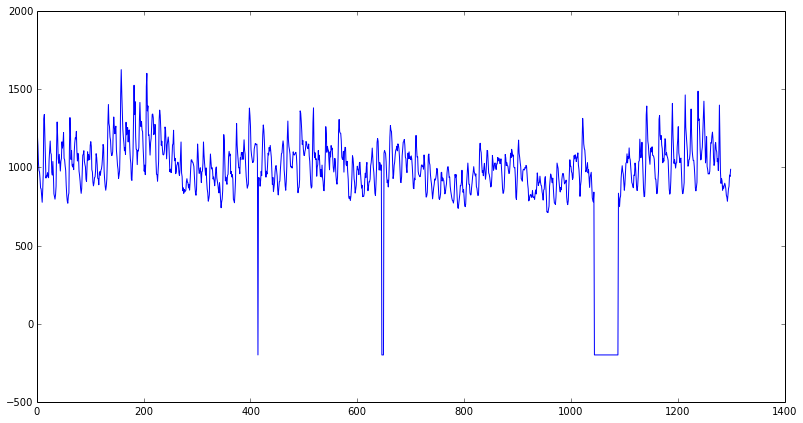

In [149]:
load_plot_col( aq_df, "PT08.S1(CO)", 3000, 4300 )

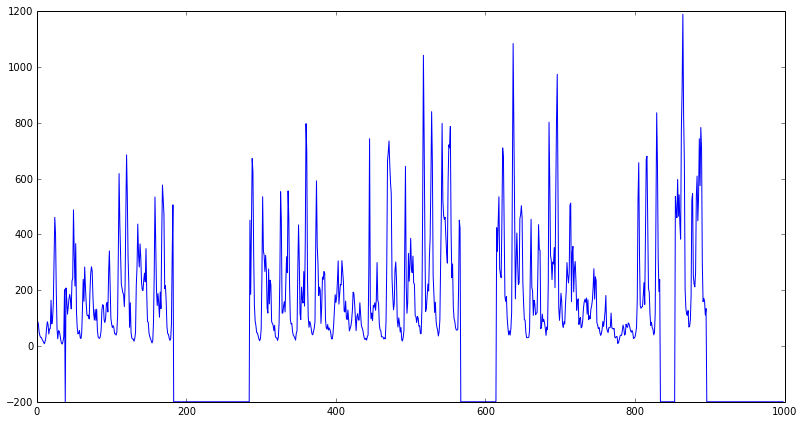

In [142]:
load_plot_col( aq_df, "NMHC(GT)" ,1,1000 )

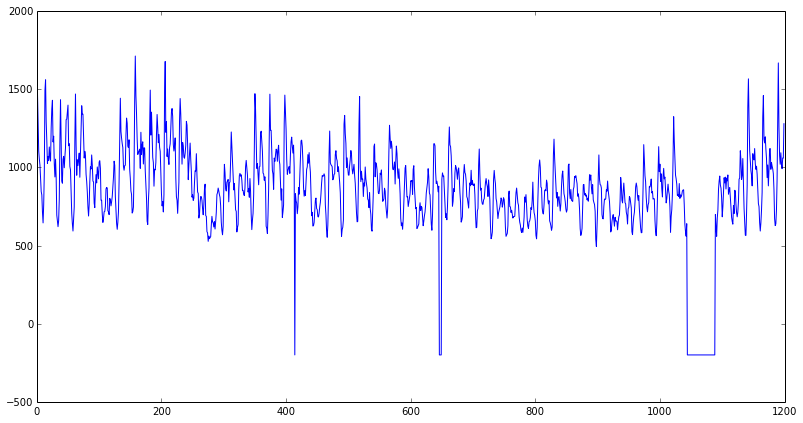

In [147]:
load_plot_col( aq_df, "PT08.S2(NMHC)" ,3000,4200 )

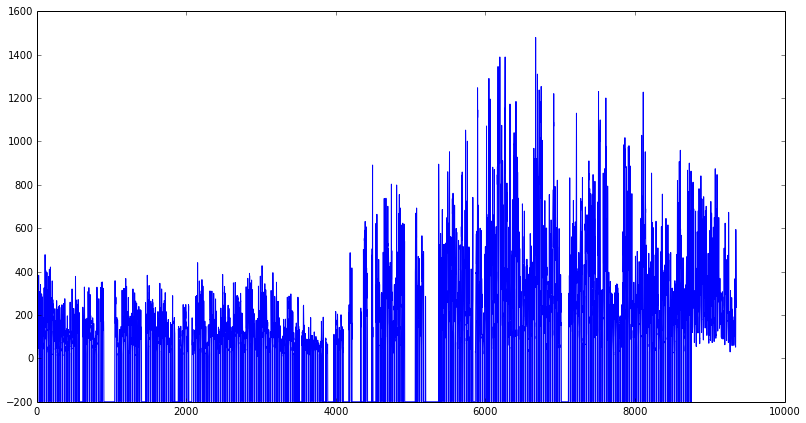

In [150]:
load_plot_col( aq_df, "NOx(GT)" ,1,aq_cnt )

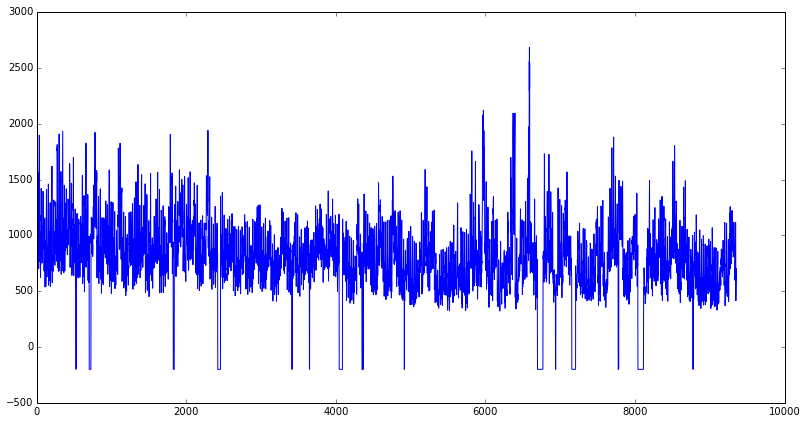

In [151]:
load_plot_col( aq_df, "PT08.S3(NOx)" ,1,aq_cnt )

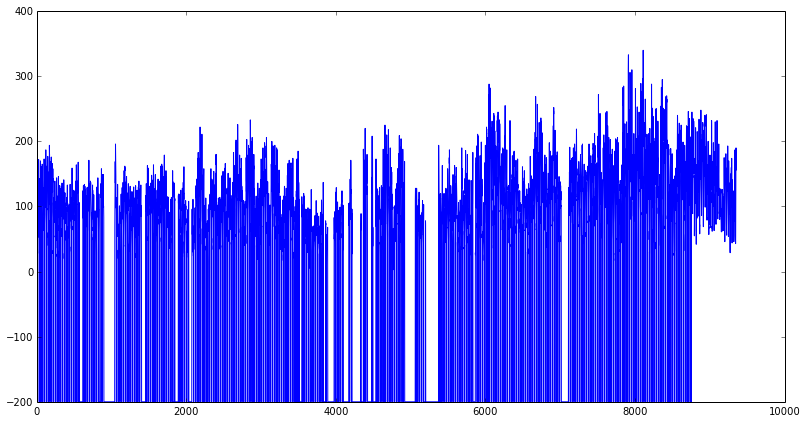

In [152]:
load_plot_col( aq_df, "NO2(GT)" ,1,aq_cnt )

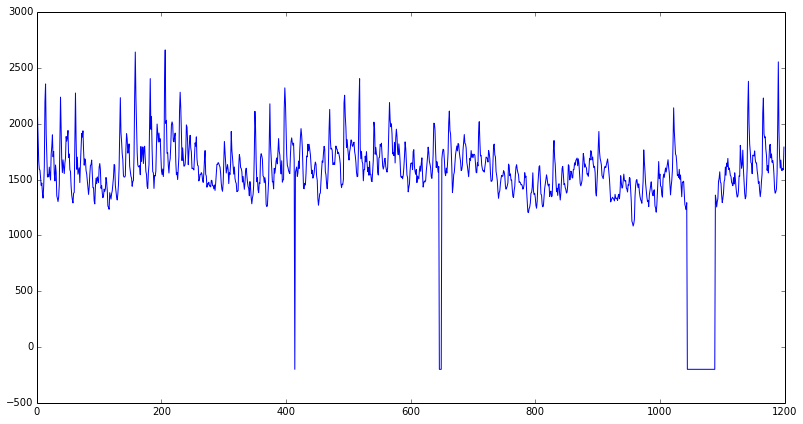

In [158]:
load_plot_col( aq_df, "PT08.S4(NO2)" ,3000,4200 )

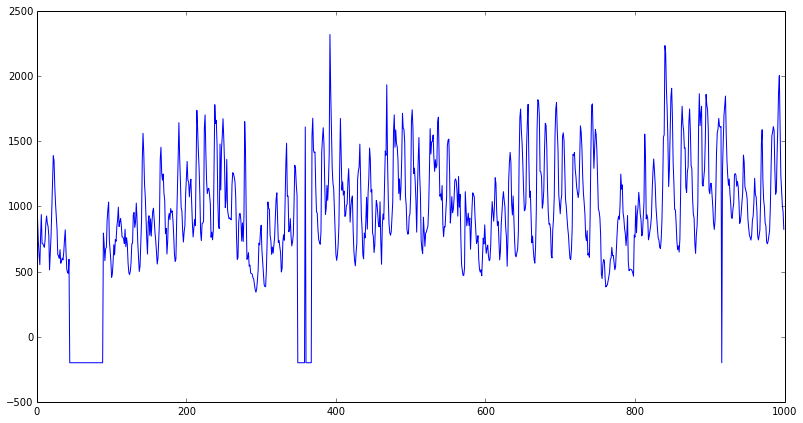

In [162]:
load_plot_col( aq_df, "PT08.S5(O3)" ,4000,5000 )


Index([u'Date', u'Open', u'High', u'Low', u'Close', u'Volume', u'Adj Close'], dtype='object')
(16653, 7)
(16653, 7)
(16653, 7)


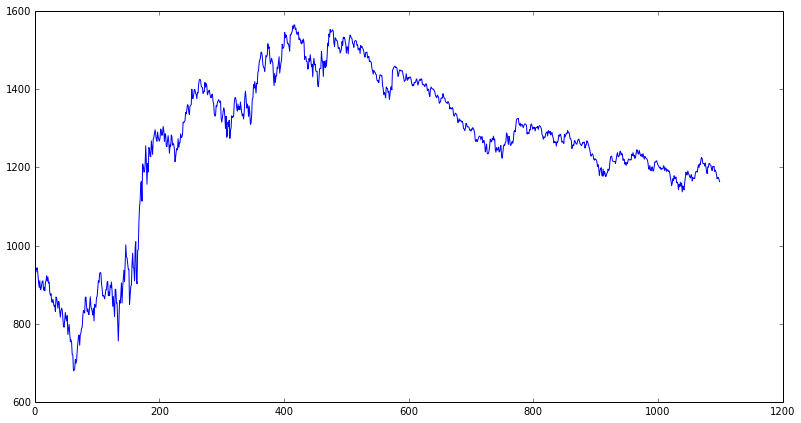

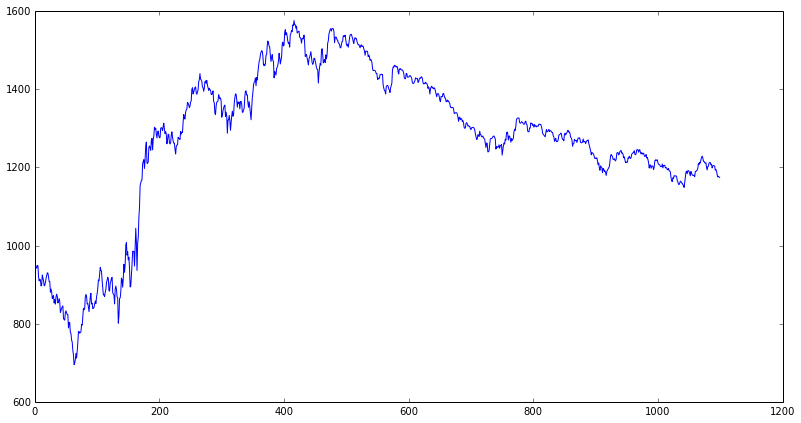

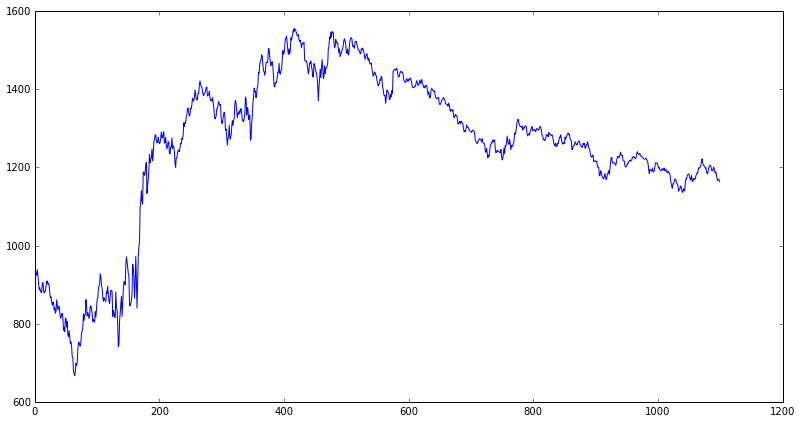

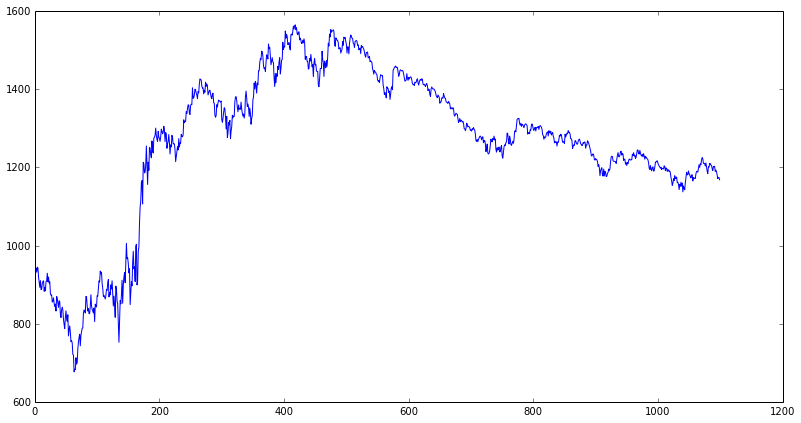

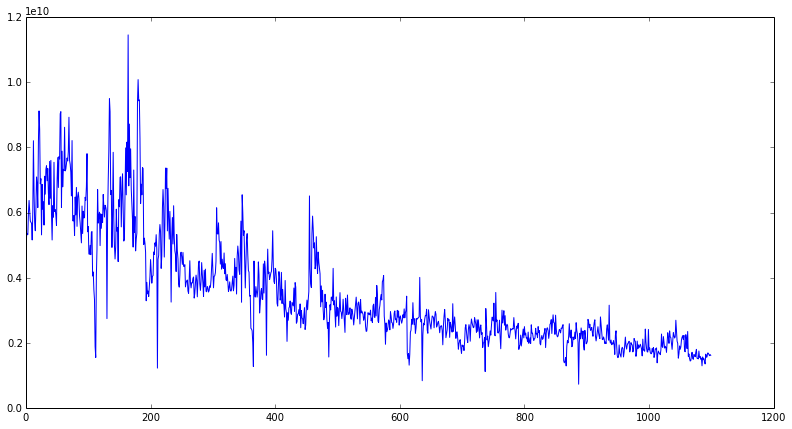

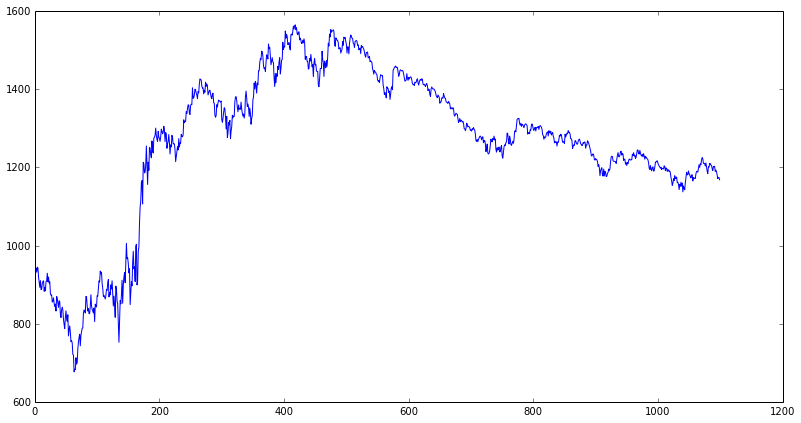

In [172]:
stock_df, stock_columns = load_dataset("/home/guo/rnn_changePoint/dataset/"+"stock.csv",\
                                       ',', False)

# tmpdf= pd.read_csv( "/home/guo/rnn_changePoint/dataset/"+"dow_idx")
# print tmpdf.columns
# print tmpdf.iloc[0]

stock_cnt= stock_df.shape[0]
for i in range(1, len(stock_columns) ):
    load_plot_col( stock_df, stock_columns[i],1700, 2800)

Index([u'0', u'1502', u'2215', u'2153', u'1'], dtype='object')
(162500, 5)
(162500, 5)
(162500, 5)


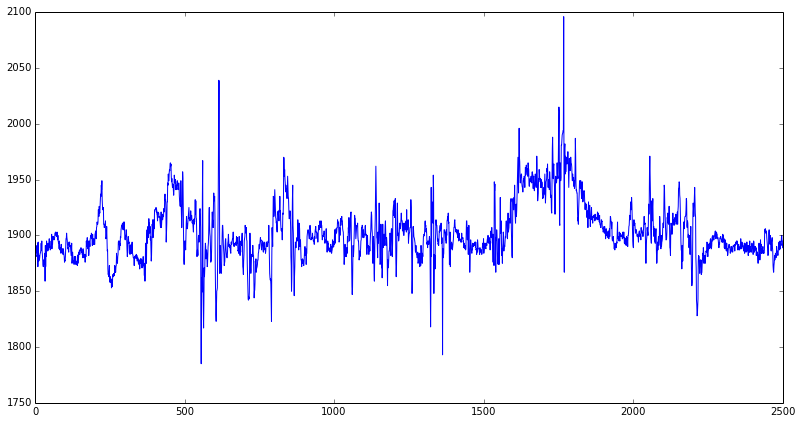

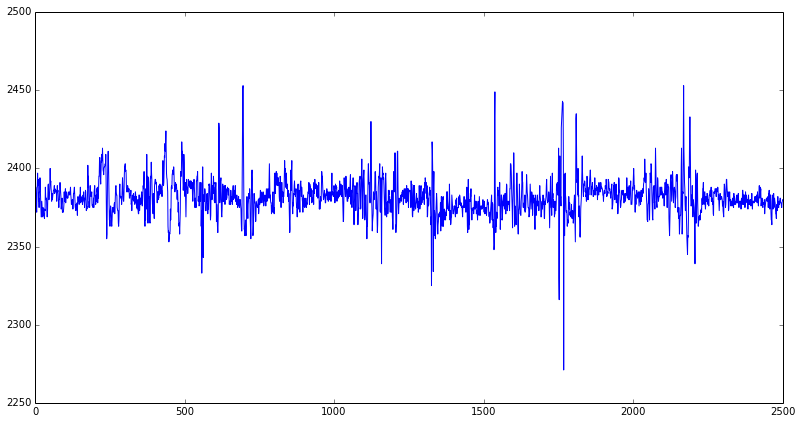

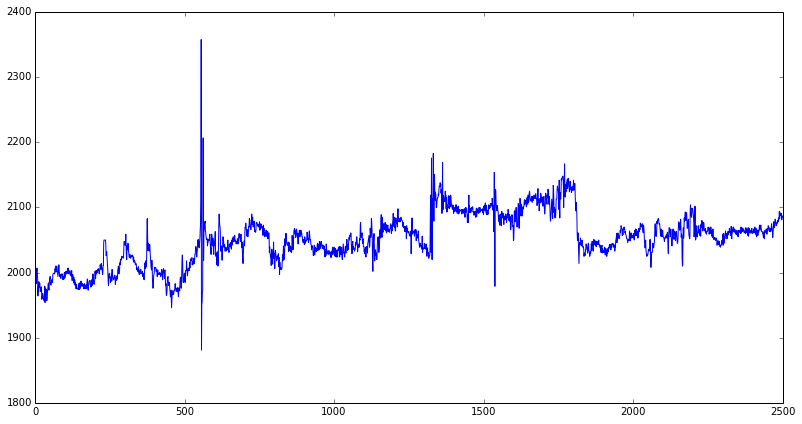

In [185]:
act_df, act_columns = load_dataset("/home/guo/rnn_changePoint/dataset/"+\
                            "Activity Recognition from Single Chest-Mounted Accelerometer/"
                              +"1.csv", ',', False)

# tmpdf= pd.read_csv( "/home/guo/rnn_changePoint/dataset/"+"dow_idx")
# print tmpdf.columns
# print tmpdf.iloc[0]

actcnt= act_df.shape[0]

for i in range(1, len(act_columns)-1 ):
    load_plot_col( act_df, act_columns[i],   147500,150000 )

Index([u'0', u'1984', u'1998', u'1645', u'1'], dtype='object')
(138000, 5)
(138000, 5)
(138000, 5)


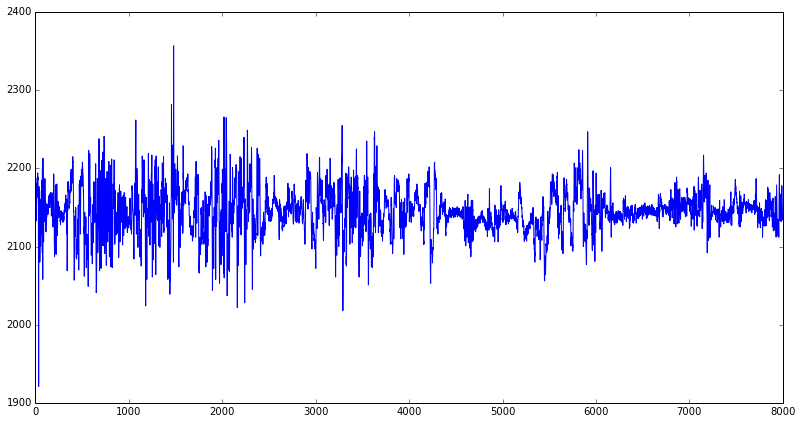

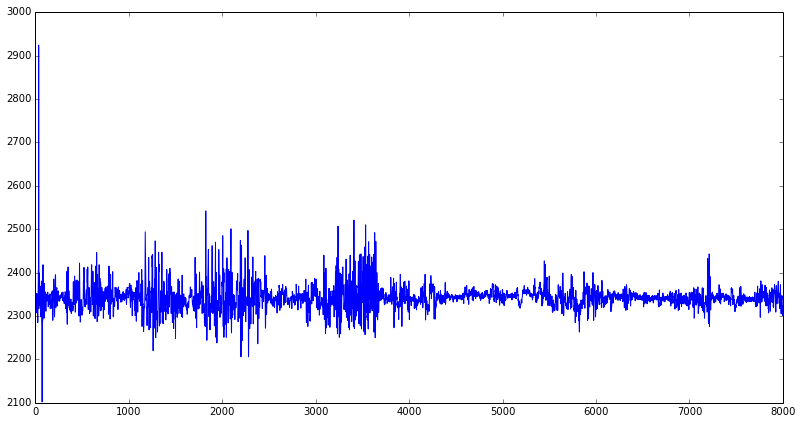

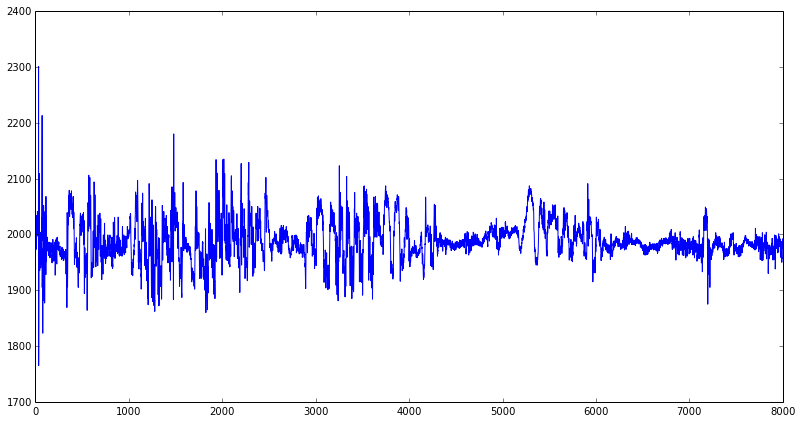

In [96]:
act_df2, act_columns2 = load_dataset("/home/guo/rnn_changePoint/dataset/"+\
                            "Activity Recognition from Single Chest-Mounted Accelerometer/"
                              +"2.csv", ',', False)

# tmpdf= pd.read_csv( "/home/guo/rnn_changePoint/dataset/"+"dow_idx")
# print tmpdf.columns
# print tmpdf.iloc[0]

for i in range(1, len(act_columns2)-1 ):
    load_plot_col( act_df2, act_columns2[i], 130000,act_df2.shape[0] )

Index([u'date', u'Temperature', u'Humidity', u'Light', u'CO2',
       u'HumidityRatio', u'Occupancy'],
      dtype='object')
(9752, 7)
(9752, 7)
(9752, 7)


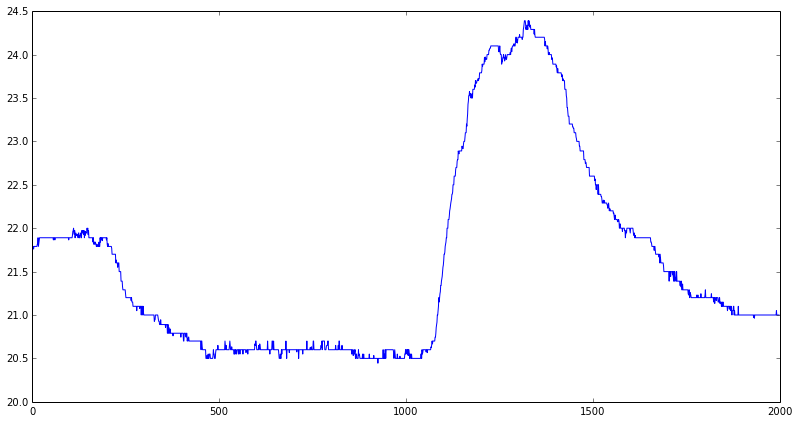

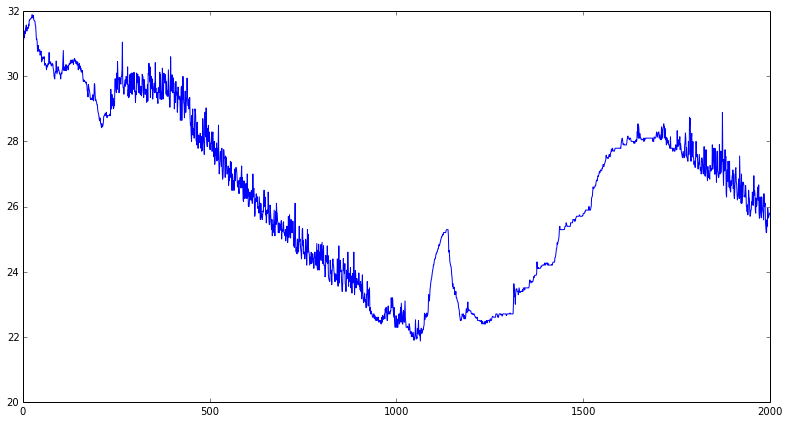

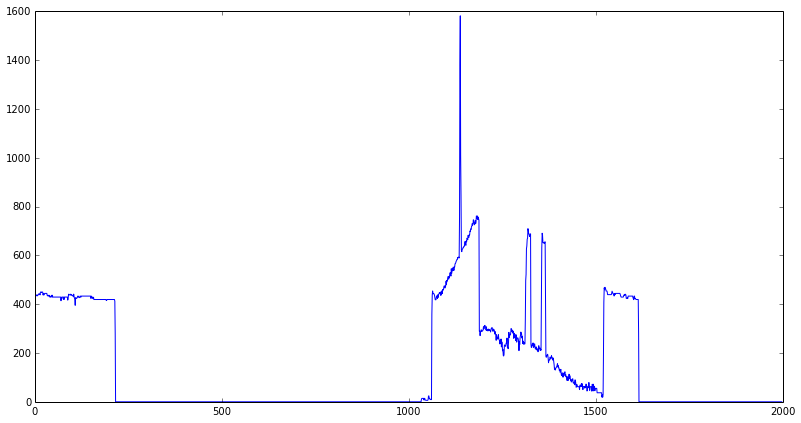

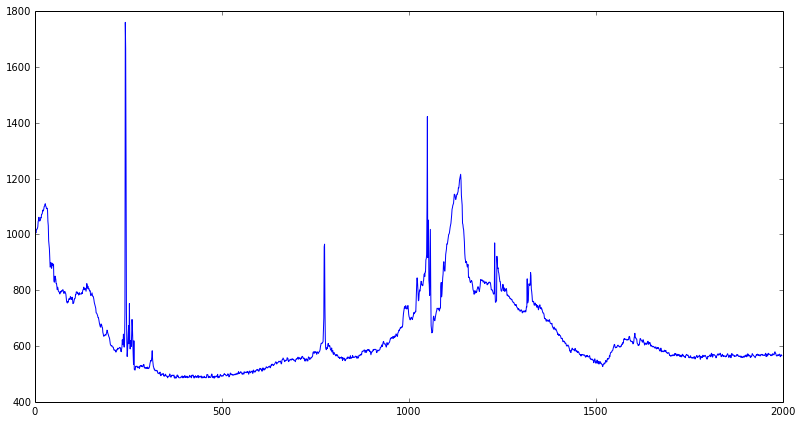

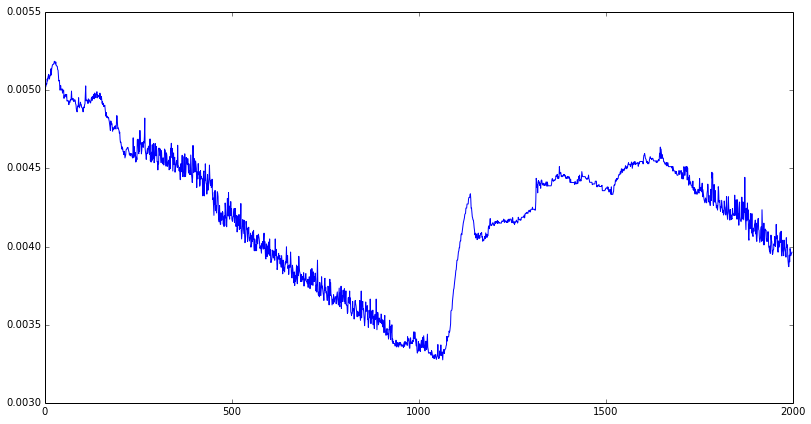

In [114]:
occ_df,occ_columns = load_dataset("/home/guo/rnn_changePoint/dataset/"+\
                            "occupancy_data/"
                              +"datatest2.txt", ',', False)

# tmpdf= pd.read_csv( "/home/guo/rnn_changePoint/dataset/"+"dow_idx")
# print tmpdf.columns
# print tmpdf.iloc[0]

for i in range(1, len(occ_columns)-1 ):
    load_plot_col( occ_df, occ_columns[i], 1, 2000 )

In [44]:
tmp= np.random.normal( 1, 1, 1 )
print tmp[0]

-1.6479815598


In [356]:
# synthetic data generator 

seg_num=5
seg_len_min= 800
seg_len_max= 1500

mean_min=1
mean_max= 70
var_min = 1
var_max=100

outlier_times = 25
outlier_prob=0.01

# trend_coeff = 0.5

def generate_one_ts( hasTrend ):
    
    tmpts=[]
    tcnt=0
    tmp_cp_list=[]
    tmp_outlier_list=[]
    
    cpflag=[]
    outflag=[]
    
    for i in range(seg_num):
        seg_len = int(np.random.uniform([seg_len_min, seg_len_max, 1])[1])
        seg_mean = np.random.uniform([mean_min, mean_max, 1])[1]
        seg_var = seg_mean*0.2

        print "segment",i,":",seg_len, seg_mean, tcnt+seg_len,seg_var
        tmp= np.random.normal( seg_mean, seg_var, seg_len )
        tmp_cp_list.append( tcnt )
        
        trend_coeff = np.random.uniform(-0.3,0.3)
        
        for i in range(seg_len):
            
            if i ==0:
                cpflag.append(1)
            else:
                cpflag.append(0)
            
            
            if hasTrend== True:
                add_trend = trend_coeff *(tcnt+i)
            else:
                add_trend=0.0
            
            
            if np.random.uniform() <= outlier_prob:
                tmpts.append(  np.random.normal( seg_mean, seg_var, 1 )[0]  +   seg_var*outlier_times+ add_trend )
                tmp_outlier_list.append( i+ tcnt )
                
                outflag.append(1)
            else:
                tmpts.append(  tmp[i]+add_trend ) 
                
                outflag.append(0)
        
        tcnt= tcnt + seg_len
        
    
    return tmpts, tmp_cp_list, tmp_outlier_list,  cpflag, outflag

def extract_multiTS_tuple(idx, num_multi_ts):
    tmplist=[]
    for i in range(num_multi_ts):
        tmplist.append( tmp_mts[i][idx] )
    return tmplist


segment 0 : 852 51.9580146538 852 10.3916029308
segment 1 : 931 63.6869403476 1783 12.7373880695
segment 2 : 323 19.3698500748 2106 3.87397001495
segment 3 : 24 44.4662204773 2130 8.89324409545
segment 4 : 991 23.2959291741 3121 4.65918583482
lenght of time series: 3121
number of outliers:  27


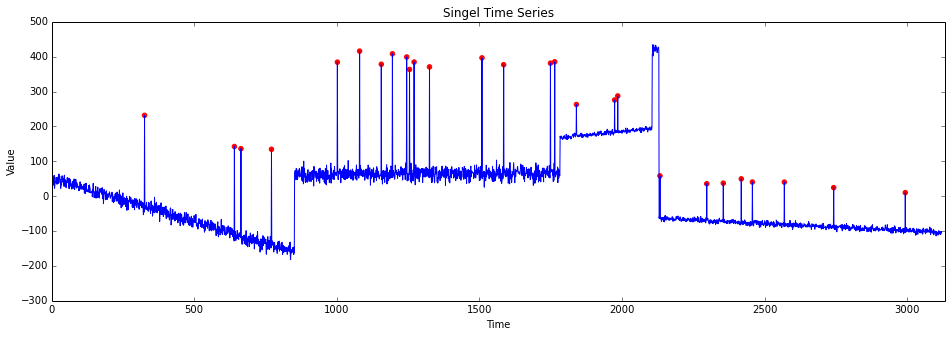

In [357]:
# single time series

# 4 trend: the additive trend value for this timestamp 
#     5 noise: the additive noise value for this timestamp
#     6 seasonality1: the 12-hour seasonality value
#     7 seasonality2: the daily seasonality value
#     8 seasonality3: the weekly seasonality value

tsList, cpList, outlierList, cpflag, outflag = generate_one_ts(True)
print "lenght of time series:", len(tsList)

fig = plt.figure()
figure_size= ( 16,5)
fig.set_size_inches( figure_size )
plt.plot(tsList)
plt.title('Singel Time Series')
plt.ylabel('Value')
plt.xlabel('Time')

axes = plt.gca()
axes.set_xlim([1, len(tsList)+10])

outliers=[]
for i in outlierList:
    outliers.append(  tsList[i]   )

plt.scatter(outlierList , outliers,  color='red', label='Outliers')

print "number of outliers: ", len(outliers)

total_ts = list(zip(tsList, cpflag, outflag))
tmpdf=pd.DataFrame(total_ts)
tmpdf.to_csv('../dataset/synthetic/syn_dta_trend8.csv', index=False, header=False)


In [ ]:
def load_data_plot( fileNo,  dta_folder):
    
    tmpdf= pd.read_csv( dta_folder + str(fileNo) + ".csv")
    tmp_col=  range( 1, tmpdf.shape[0]+1 ) 
    tmpdf.insert(0, 'timestamp', tmp_col)
    tdf= tmpdf
    
    maxval= max(tdf['value'])
    minval= min(tdf['value'])
    outliers= tdf[ tdf['is_anomaly'] ==1  ]
    
    figure_size= ( 10,5)
    legend_font= 8.5
    fig = plt.figure()
    fig.set_size_inches( figure_size )

    plt.plot( list( tdf['value']), label='Normal data' )
    plt.scatter( list(outliers['timestamp']),list(outliers['value']), color='red',\
                label='Outliers'  )

    axes = plt.gca()
    axes.set_xlim([1, tdf.shape[0]+10])
  
    plt.title('Yahoo Real Data ('+'files: real_' + str(fileNo) +')')
    plt.ylabel('Value')
    plt.xlabel('Time (seconds)')
    plt.legend()
#     plt.legend(loc=0, ncol=5, mode="expand", borderaxespad=0., fontsize= legend_font 
# , numpoints=1 )
    
    value_drift_observe( list(tdf['value']), 'real_'+str(fileNo) )  

Index([u'21.8882978972', u'1', u'0'], dtype='object')
(457, 3)
(457, 3)
(457, 3)
Index([u'30.497236826', u'1', u'0'], dtype='object')
(985, 3)
(985, 3)
(985, 3)
Index([u'62.2600733748', u'1', u'0'], dtype='object')
(1413, 3)
(1413, 3)
(1413, 3)
Index([u'18.6910056506', u'1', u'0'], dtype='object')
(309, 3)
(309, 3)
(309, 3)
Index([u'50.0334804572', u'1', u'0'], dtype='object')
(1491, 3)
(1491, 3)
(1491, 3)


IOError: File /home/guo/rnn_changePoint/dataset/synthetic/syn_dta_trend5.csv does not exist

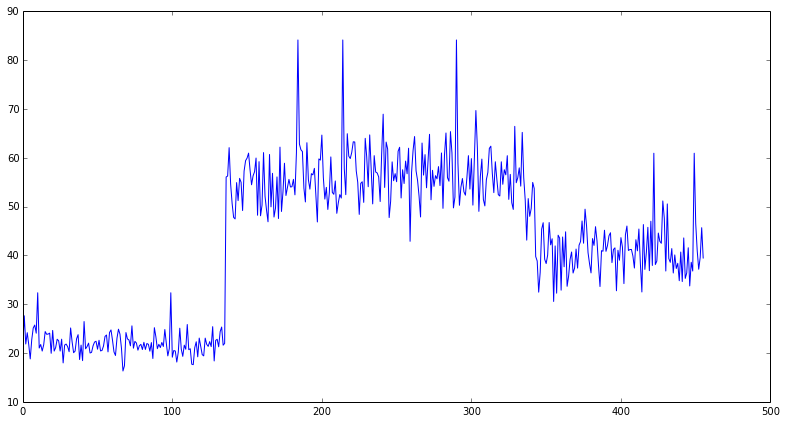

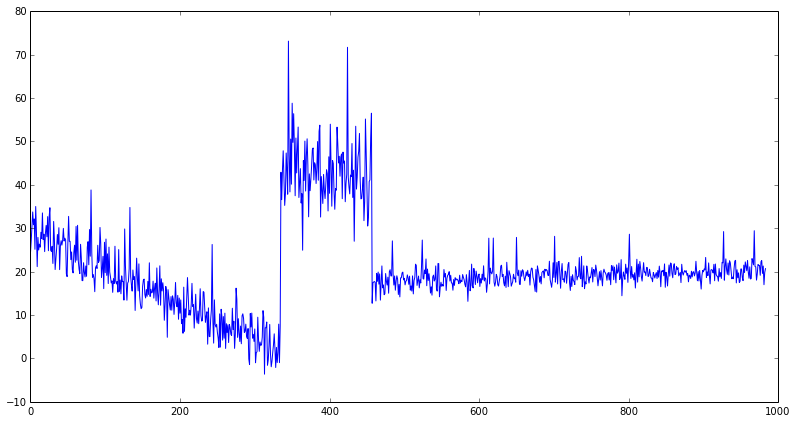

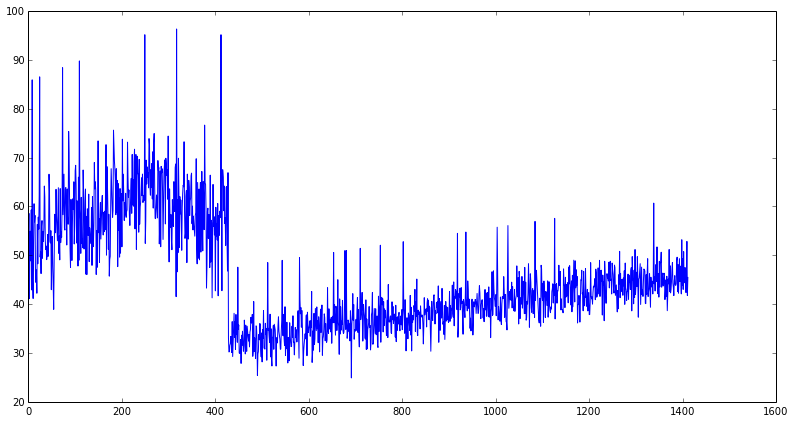

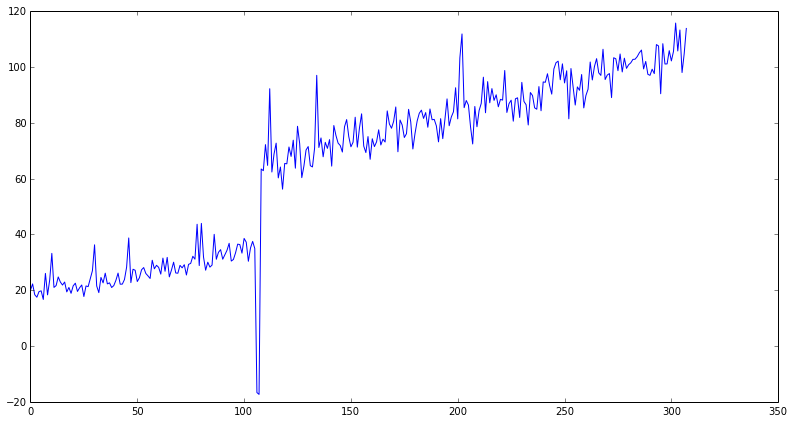

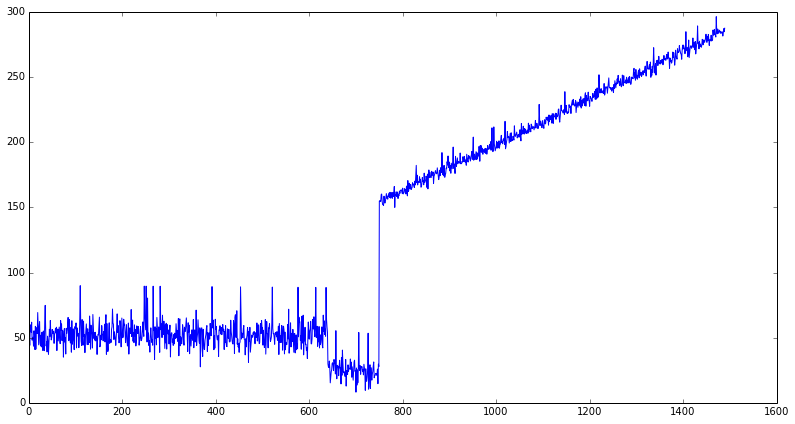

In [5]:
sy_df, sy_columns = load_dataset("/home/guo/rnn_changePoint/dataset/synthetic/"+\
                                "syn_dta"+".csv",',',False)
sycnt= sy_df.shape[0]
    
for i in range(0, len(sy_columns)-2 ):
    load_plot_col( sy_df, sy_columns[i],1, sycnt)


for i in range(6):
    i=i+1
    
    sy_df, sy_columns = load_dataset("/home/guo/rnn_changePoint/dataset/synthetic/"+\
                                "syn_dta_trend"+str(i)+".csv",',',False)
    sycnt= sy_df.shape[0]
    
    for i in range(0, len(sy_columns)-2 ):
        load_plot_col( sy_df, sy_columns[i],1, sycnt)